<a href="https://colab.research.google.com/github/WoradeeKongthong/image_classification/blob/master/Fashion_MNIST_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np

# Dataset

## Load the Fashion-MNIST dataset
Labels  

Each training and test example is assigned to one of the following labels:

0 T-shirt/top  
1 Trouser  
2 Pullover  
3 Dress  
4 Coat  
5 Sandal  
6 Shirt  
7 Sneaker  
8 Bag  
9 Ankle boot  

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Train X shape :  (60000, 28, 28)
Train y shape :  (60000,)
Test X shape :  (10000, 28, 28)
Test y shape :  (10000,)


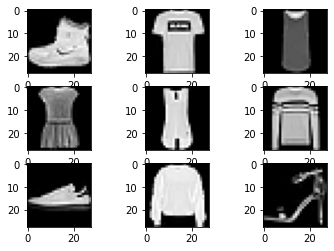

In [ ]:
# summarize loaded dataset
print('Train X shape : ', trainX.shape)
print('Train y shape : ', trainy.shape)
print('Test X shape : ', testX.shape)
print('Test y shape : ', testy.shape)

# plot some images
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

## Preprocess dataset

In [ ]:
# reshape trainX and testX to have single channel
trainX = np.expand_dims(trainX, axis=3)
testX = np.expand_dims(testX, axis=3)

print('Train X shape : ', trainX.shape)
print('Test X shape : ', testX.shape)

Train X shape :  (60000, 28, 28, 1)
Test X shape :  (10000, 28, 28, 1)


In [ ]:
print(trainy[:10])

[9 0 0 3 0 2 7 2 5 5]


In [ ]:
# one hot encode trainy and testy 
#(keras.utils.to_categorical converts a class vector (integers) to binary class matrix)

trainy = to_categorical(trainy)
testy = to_categorical(testy)

print('Train y shape : ', trainy.shape)
print('Test y shape : ', testy.shape)
print('Train y examples :')
for i in range(9):
  print(trainy[i])

Train y shape :  (60000, 10)
Test y shape :  (10000, 10)
Train y examples :
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# check Pixel Data
print(trainX.dtype)
print('min : %d, max : %d' %(trainX.min(), trainX.max()))

uint8
min : 0, max : 255


In [ ]:
# convert from uint8 to float32
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

# check Pixel Data
print(trainX.dtype)
print('min : %d, max : %d' %(trainX.min(), trainX.max()))

float32
min : 0, max : 1


# Baseline Model : simple CNN model

## Define Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

In [ ]:
# define simple CNN model
def baseline_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3),padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = baseline_model()

## Fit the model

In [ ]:
history = model.fit(trainX, trainy, epochs=20, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 25s 34ms/step - loss: 0.4667 - accuracy: 0.8324 - val_loss: 0.3733 - val_accuracy: 0.8651
Epoch 2/20
750/750 [==============================] - 25s 34ms/step - loss: 0.3251 - accuracy: 0.8834 - val_loss: 0.3081 - val_accuracy: 0.8892
Epoch 3/20
750/750 [==============================] - 25s 34ms/step - loss: 0.2781 - accuracy: 0.8985 - val_loss: 0.2878 - val_accuracy: 0.8974
Epoch 4/20
750/750 [==============================] - 25s 34ms/step - loss: 0.2497 - accuracy: 0.9081 - val_loss: 0.2837 - val_accuracy: 0.8992
Epoch 5/20
750/750 [==============================] - 25s 34ms/step - loss: 0.2255 - accuracy: 0.9173 - val_loss: 0.2656 - val_accuracy: 0.9038
Epoch 6/20
750/750 [==============================] - 25s 34ms/step - loss: 0.2072 - accuracy: 0.9241 - val_loss: 0.2503 - val_accuracy: 0.9086
Epoch 7/20
750/750 [==============================] - 25s 34ms/step - loss: 0.1928 - accuracy: 0.9296 - val_loss: 0.2585 - val_accuracy:

## Results : Learning Curve and Model Performance

In [ ]:
# plot learning curve and print model performance
def summarize_model(history):
  # learning curve
  plt.figure(figsize=(8,8))

  # plot loss
  plt.subplot(211)
  plt.plot(history.history['loss'], color='green', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='validation')
  plt.title('Cross Entropy Loss')
  plt.legend()

  # plot accuracy
  plt.subplot(212)
  plt.plot(history.history['accuracy'], color='green', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='validation')
  plt.title('Classification Accuracy')
  plt.legend()
  plt.show()
  
  # model performance
  _, train_acc = model.evaluate(trainX, trainy, verbose=0)
  _, test_acc = model.evaluate(testX, testy, verbose=0)
  print('Model Performance (accuracy)')
  print('Train : %.3f' %train_acc)
  print('Test :  %.3f' %test_acc)

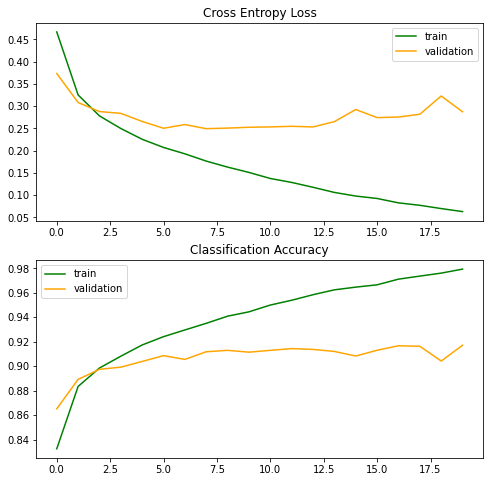

Model Performance (accuracy)
Train : 0.974
Test :  0.912


In [ ]:
summarize_model(history)

Note :  
*   the learning performance can improve with more epochs
*   overfitting is shown 

# Develop Model : increasing number of filters in covolutional layer

In [ ]:
# define model01 : increase number of filters in convolutional layer
def model01():
  model = Sequential()
  model.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Epoch 1/20
750/750 [==============================] - 44s 59ms/step - loss: 0.4794 - accuracy: 0.8295 - val_loss: 0.3484 - val_accuracy: 0.8752
Epoch 2/20
750/750 [==============================] - 40s 53ms/step - loss: 0.3171 - accuracy: 0.8863 - val_loss: 0.3273 - val_accuracy: 0.8817
Epoch 3/20
750/750 [==============================] - 39s 53ms/step - loss: 0.2659 - accuracy: 0.9032 - val_loss: 0.2843 - val_accuracy: 0.8966
Epoch 4/20
750/750 [==============================] - 39s 52ms/step - loss: 0.2405 - accuracy: 0.9121 - val_loss: 0.2739 - val_accuracy: 0.9016
Epoch 5/20
750/750 [==============================] - 39s 52ms/step - loss: 0.2167 - accuracy: 0.9199 - val_loss: 0.2644 - val_accuracy: 0.9040
Epoch 6/20
750/750 [==============================] - 39s 52ms/step - loss: 0.1992 - accuracy: 0.9271 - val_loss: 0.2528 - val_accuracy: 0.9113
Epoch 7/20
750/750 [==============================] - 40s 53ms/step - loss: 0.1821 - accuracy: 0.9336 - val_loss: 0.2503 - val_accuracy:

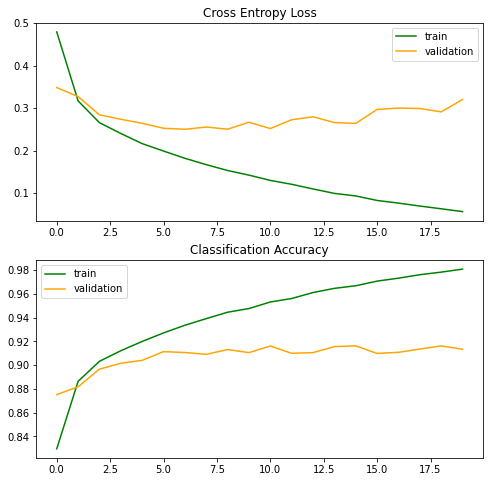

Model Performance (accuracy)
Train : 0.969
Test :  0.909


In [ ]:
model = model01()
history = model.fit(trainX, trainy, batch_size=64, epochs=20, validation_split=0.2)
summarize_model(history)

Note : Increasing number of filters doesn't help improving performance

#Develop Model : try VGG block 
with number of filters = 32 as of baseline model

In [ ]:
from keras.layers import Input
from keras.models import Model

In [ ]:
# function for creating a vgg block
def vgg_block(layer_in, n_filters, n_conv):
	# add convolutional layers
	for _ in range(n_conv):
		layer_in = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_uniform')(layer_in)
	# add max pooling layer
	layer_in = MaxPooling2D((2,2))(layer_in)
	return layer_in

In [ ]:
# define model02 : VGG-block (Functional API)
def model02():
  # define model input
  visible = Input(shape=(28, 28, 1))
  # add first vgg module
  layer = vgg_block(visible, 32, 2)
  # add Flatten
  layer = Flatten()(layer)
  # add classifier
  layer = Dense(128, activation='relu', kernel_initializer='he_uniform')(layer)
  layer = Dense(10, activation='softmax')(layer)
  # create model
  model = Model(inputs=visible, outputs=layer)

  # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  
  return model

Epoch 1/20
750/750 [==============================] - 100s 133ms/step - loss: 0.4348 - accuracy: 0.8469 - val_loss: 0.3458 - val_accuracy: 0.8759
Epoch 2/20
750/750 [==============================] - 99s 133ms/step - loss: 0.2849 - accuracy: 0.8979 - val_loss: 0.2750 - val_accuracy: 0.8967
Epoch 3/20
750/750 [==============================] - 99s 132ms/step - loss: 0.2339 - accuracy: 0.9149 - val_loss: 0.2506 - val_accuracy: 0.9082
Epoch 4/20
750/750 [==============================] - 99s 132ms/step - loss: 0.1953 - accuracy: 0.9290 - val_loss: 0.2364 - val_accuracy: 0.9106
Epoch 5/20
750/750 [==============================] - 99s 131ms/step - loss: 0.1657 - accuracy: 0.9405 - val_loss: 0.2342 - val_accuracy: 0.9155
Epoch 6/20
750/750 [==============================] - 104s 138ms/step - loss: 0.1423 - accuracy: 0.9478 - val_loss: 0.2273 - val_accuracy: 0.9178
Epoch 7/20
750/750 [==============================] - 99s 132ms/step - loss: 0.1194 - accuracy: 0.9566 - val_loss: 0.2338 - val_

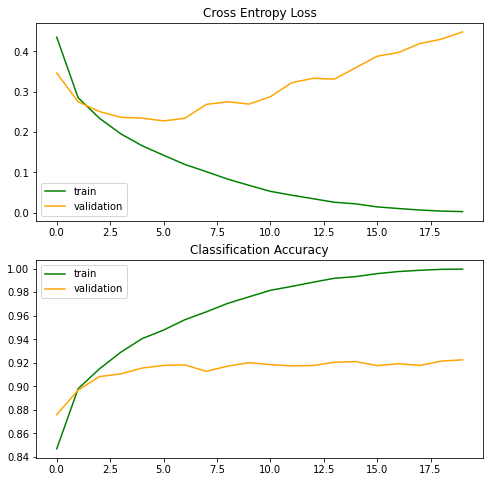

Model Performance (accuracy)
Train : 0.984
Test :  0.918


In [ ]:
model = model02()
history = model.fit(trainX, trainy, batch_size=64, epochs=20 , validation_split=0.2)
summarize_model(history)

Note : the performance of training set looks better, let's deal with the overfitting

# Develop Model : add Dropout layers
common approach :  
*   add Dropout() after Maxpooling and Dense layers



In [ ]:
from keras.layers import Dropout

In [ ]:
# define model03 : VGG-block (Functional API) + Regularization (after vgg block and dense layer)
def model03():
  # define model input
  visible = Input(shape=(28, 28, 1))
  # add first vgg module
  layer = vgg_block(visible, 64, 2)
  # add Dropout
  layer = Dropout(0.2)(layer)
  # add Flatten
  layer = Flatten()(layer)
  # add classifier
  layer = Dense(128, activation='relu', kernel_initializer='he_uniform')(layer)
  layer = Dropout(0.2)(layer)
  layer = Dense(10, activation='softmax')(layer)
  # create model
  model = Model(inputs=visible, outputs=layer)

  # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  
  return model

Epoch 1/20
750/750 [==============================] - 261s 348ms/step - loss: 0.4850 - accuracy: 0.8252 - val_loss: 0.3326 - val_accuracy: 0.8786
Epoch 2/20
750/750 [==============================] - 263s 350ms/step - loss: 0.3318 - accuracy: 0.8791 - val_loss: 0.2860 - val_accuracy: 0.8964
Epoch 3/20
750/750 [==============================] - 261s 348ms/step - loss: 0.2832 - accuracy: 0.8956 - val_loss: 0.2647 - val_accuracy: 0.9010
Epoch 4/20
750/750 [==============================] - 259s 346ms/step - loss: 0.2517 - accuracy: 0.9058 - val_loss: 0.2473 - val_accuracy: 0.9095
Epoch 5/20
750/750 [==============================] - 260s 346ms/step - loss: 0.2234 - accuracy: 0.9178 - val_loss: 0.2314 - val_accuracy: 0.9137
Epoch 6/20
750/750 [==============================] - 259s 345ms/step - loss: 0.2027 - accuracy: 0.9239 - val_loss: 0.2277 - val_accuracy: 0.9173
Epoch 7/20
750/750 [==============================] - 265s 353ms/step - loss: 0.1806 - accuracy: 0.9335 - val_loss: 0.2411 -

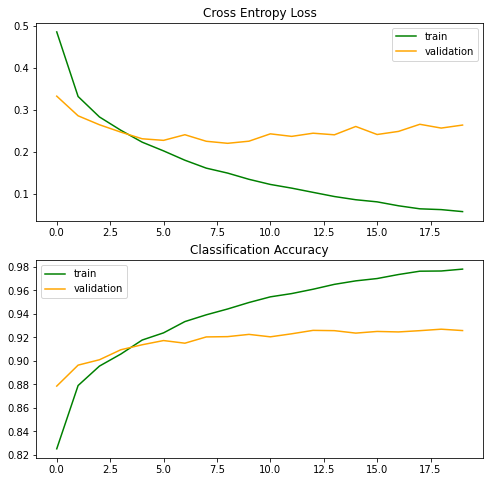

Model Performance (accuracy)
Train : 0.982
Test :  0.924


In [ ]:
model = model03()
history = model.fit(trainX, trainy, batch_size=64, epochs=20 , validation_split=0.2)
summarize_model(history)

Note : the performances getting slightly closer but overfitting still show

# Develop Model : add BatchNormalization
helps stabilize the learning 
common approach :  
*   add BatchNormalization() after convolutional layers
*   increasing pattern of dropout rates

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
# define model04 : VGG-block (Functional API) + Regularization + BatchNormalization

# function for creating a vgg block
def vgg_block(layer_in, n_filters, n_conv) :
	# add convolutional layers
  for _ in range(n_conv) :
    layer_in = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_uniform')(layer_in)
    layer_in = BatchNormalization()(layer_in)
  # add max pooling layer
  layer_in = MaxPooling2D((2,2))(layer_in)
  return layer_in

def model04():
  # define model input
  visible = Input(shape=(28, 28, 1))
  # add first vgg module
  layer = vgg_block(visible, 64, 2)
  # add Dropout
  layer = Dropout(0.2)(layer)
  # add Flatten
  layer = Flatten()(layer)
  # add classifier
  layer = Dense(128, activation='relu', kernel_initializer='he_uniform')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(0.4)(layer)
  layer = Dense(10, activation='softmax')(layer)
  # create model
  model = Model(inputs=visible, outputs=layer)

  # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  
  return model

Epoch 1/20
750/750 [==============================] - 312s 415ms/step - loss: 0.4147 - accuracy: 0.8534 - val_loss: 0.2903 - val_accuracy: 0.8971
Epoch 2/20
750/750 [==============================] - 319s 425ms/step - loss: 0.2797 - accuracy: 0.8991 - val_loss: 0.2699 - val_accuracy: 0.9041
Epoch 3/20
750/750 [==============================] - 312s 416ms/step - loss: 0.2396 - accuracy: 0.9133 - val_loss: 0.2348 - val_accuracy: 0.9142
Epoch 4/20
750/750 [==============================] - 317s 423ms/step - loss: 0.2054 - accuracy: 0.9250 - val_loss: 0.2146 - val_accuracy: 0.9204
Epoch 5/20
750/750 [==============================] - 312s 416ms/step - loss: 0.1859 - accuracy: 0.9318 - val_loss: 0.2193 - val_accuracy: 0.9222
Epoch 6/20
750/750 [==============================] - 317s 423ms/step - loss: 0.1686 - accuracy: 0.9384 - val_loss: 0.2284 - val_accuracy: 0.9212
Epoch 7/20
750/750 [==============================] - 317s 422ms/step - loss: 0.1526 - accuracy: 0.9449 - val_loss: 0.2118 -

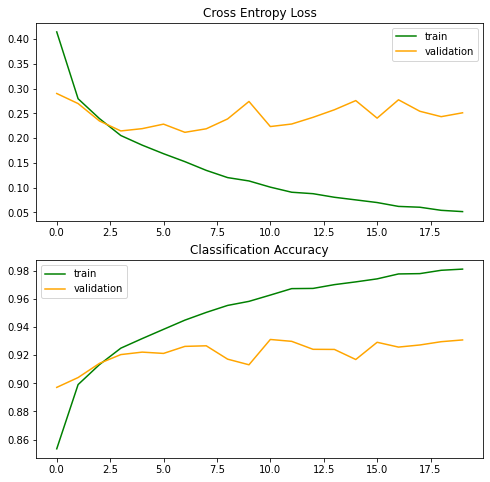

Model Performance (accuracy)
Train : 0.983
Test :  0.924


In [ ]:
model = model04()
history = model.fit(trainX, trainy, batch_size=64, epochs=20 , validation_split=0.2)
summarize_model(history)

Note :  The results looks not difference, there is still overfitting


**Develop model further**  
to reduce overfitting
*   data augmentation

to improve performance
*   model depth


# Finalize the model and Save it
Selected model : model03 (VGG with Dropout)  
Finalize the model : fit the model with entire training set  
Save the model as .h5 

In [ ]:
model = model03()
# Finalize Model
model.fit(trainX, trainy, epochs=20, batch_size=32, verbose=1)
# Save the Model
model.save('final_model.h5')

Epoch 1/20
1875/1875 [==============================] - 377s 201ms/step - loss: 0.5830 - accuracy: 0.8086
Epoch 2/20
1875/1875 [==============================] - 371s 198ms/step - loss: 0.3294 - accuracy: 0.8838
Epoch 3/20
1875/1875 [==============================] - 376s 201ms/step - loss: 0.2602 - accuracy: 0.9057
Epoch 4/20
1875/1875 [==============================] - 375s 200ms/step - loss: 0.2217 - accuracy: 0.9205
Epoch 5/20
1875/1875 [==============================] - 370s 197ms/step - loss: 0.1942 - accuracy: 0.9286
Epoch 6/20
1875/1875 [==============================] - 374s 199ms/step - loss: 0.1754 - accuracy: 0.9360
Epoch 7/20
1875/1875 [==============================] - 370s 198ms/step - loss: 0.1596 - accuracy: 0.9411
Epoch 8/20
1875/1875 [==============================] - 371s 198ms/step - loss: 0.1420 - accuracy: 0.9475
Epoch 9/20
1875/1875 [==============================] - 373s 199ms/step - loss: 0.1319 - accuracy: 0.9503
Epoch 10/20
1875/1875 [=======================

# Prediction
Make a prediction on a single image with the saved final model  

Labels : 
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

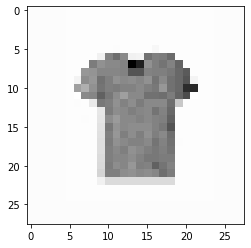

prediction :  8


In [ ]:
# load image
img = load_img('tshirt.jpg', color_mode = "grayscale", target_size=(28,28))
# plot image
plt.imshow(img, cmap='Greys_r')
plt.show()
# convert image to array
img = img_to_array(img)
# reshape image to single sample with 1 channel
img = img.reshape(1,28,28,1)
# normalize the pixel data
img = img.astype('float32')
img = img / 255.0

# load model
model = load_model('final_model.h5')

# make prediction
result = model.predict(img)
print('prediction : ', result.argmax())

Note : the model make wrong prediction with this sample

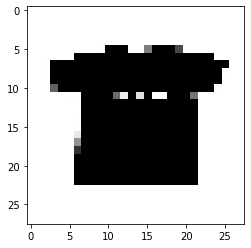

prediction :  0


In [ ]:
# Try another sample
# load image
img = load_img('tshirt1.jpg', color_mode = "grayscale", target_size=(28,28))
# plot image
plt.imshow(img, cmap='Greys_r')
plt.show()
# convert image to array
img = img_to_array(img)
# reshape image to single sample with 1 channel
img = img.reshape(1,28,28,1)
# normalize the pixel data
img = img.astype('float32')
img = img / 255.0

# load model
model = load_model('final_model.h5')

# make prediction
result = model.predict(img)
print('prediction : ', result.argmax())

Note : the model make right prediction with this sample

(28, 28, 1)


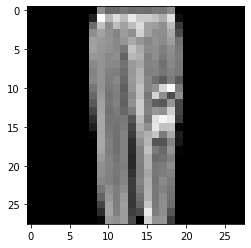

(1, 28, 28, 1)
prediction :  1
ground truth :  1


In [ ]:
# Making prediction with random sample image from test dataset
from random import randint
rand_num = randint(0, len(testX)-1)
img = testX[rand_num]
print(img.shape)
pic = (img.reshape((28,28)) * 255).astype('uint8')
plt.imshow(pic,cmap=plt.get_cmap('gray'))
plt.show()

img = np.expand_dims(img, axis=0)
print(img.shape)

ypred = model.predict(img)
print('prediction : ',ypred.argmax())
print('ground truth : ', trainy[rand_num].argmax())